In [1]:
import numpy as np
from matplotlib import pyplot as plt
from tifffile import imread
from skimage.filters import threshold_multiotsu
import os
import porespy as ps
from lpu3dnet import init_yaml

def clean_img(img_t):
    '''
    2  3^3 median image filter
    3 Otsu binary segmentation
    https://homepages.inf.ed.ac.uk/rbf/HIPR2/median.htm
    https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_multiotsu.html
    '''

    thresholds = threshold_multiotsu(img_t,classes=2)
    # from the threshold we separate regions
    img_t = np.digitize(img_t, bins=thresholds)

    return img_t


def img_crop(img,crop_size):
    x_max = img.shape[0]
    y_max = img.shape[1]
    z_max = img.shape[2]

    sec = img[
        crop_size:x_max-crop_size,
        crop_size:y_max-crop_size,
        crop_size:z_max-crop_size
        ]
    return sec

from tifffile import imwrite

def np_to_tif(img,f_name):
    '''
    convert numpy to tif
    '''

    img_save = (img * 255).astype('uint8')
    # Save the 3D array as a 3D tif
    imwrite(f_name, img_save)

def tif_to_np(f_name):
    '''
    convert tif to numpy
    '''
    img = imread(f_name)
    img = img.astype('float32')/255
    return img>0.5


In [3]:
init_yaml.PATH

{'img_path': {'main_vol': '/journel/s0/zur74/data/new_energy_well/train_vol/main_vol',
  'sub_vol': '/journel/s0/zur74/data/ibm-11/example'}}

#### Read main volume of those tif

In [4]:
img_list = []
for i in range(6):
    img_list.append(
        tif_to_np(
            os.path.join(
                init_yaml.PATH['img_path']['main_vol'],
                f'main_{i}.tif'
                )
                  )
        )

#### Calculate porosity

In [6]:
for img in img_list:
    print('Porosity of image is {}'.format(ps.metrics.porosity(img)))

Porosity of image is 0.15423793572440886
Porosity of image is 0.1994853984506826
Porosity of image is 0.1665752701826591
Porosity of image is 0.19992378274897468
Porosity of image is 0.14275199576877845
Porosity of image is 0.09128284891840108


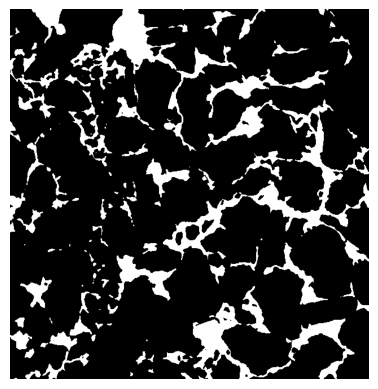

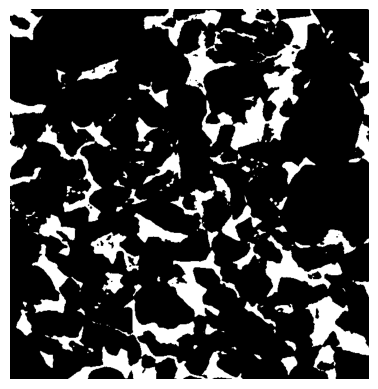

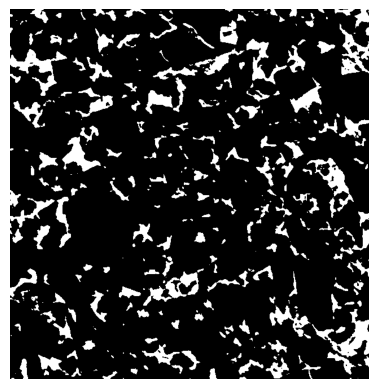

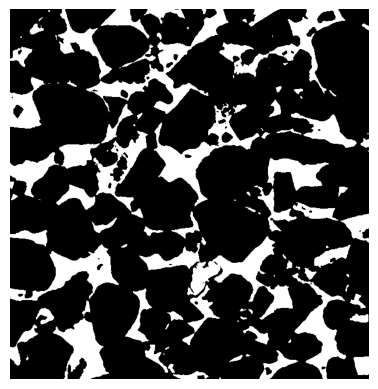

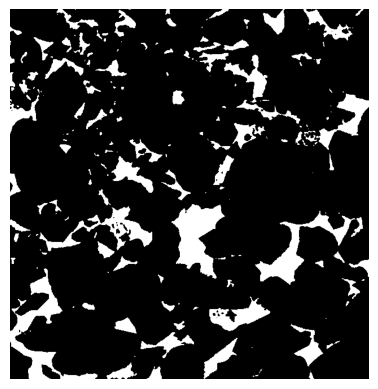

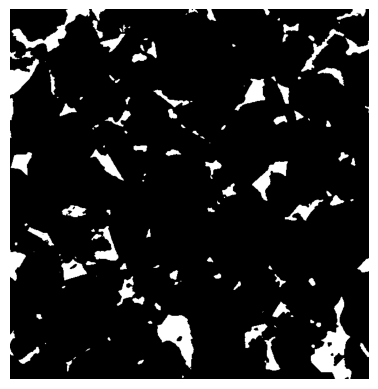

In [5]:
for sec_seg in img_list:
    plt.imshow(sec_seg[0,::],cmap='gray')
    plt.axis('off')
    plt.show()